In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
dim_data = np.prod(x_train.shape[1:])
x_train = x_train.reshape(x_train.shape[0], dim_data)
x_test= x_test.reshape(x_test.shape[0], dim_data)

#normalization
x_train = x_train.astype('float32') / 255.0
x_test= x_test.astype('float32') / 255.0


In [ ]:
#onehot lable
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
def eva(pred):
  lpre = tf.argmax(pred, axis = 1)
  ltrue = tf.argmax(y_test, axis = 1)

  print("%0.2f accuracy" % accuracy_score(ltrue,lpre))
  print("%0.2f recall" % recall_score(ltrue,lpre,average='macro'))
  print("%0.2f precision" % precision_score(ltrue,lpre,average='macro'))
  print("%0.2f f1" % f1_score(ltrue,lpre,average='macro'))



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1000, activation='relu', input_shape=(dim_data,)))
model.add(Dense(1000, activation='relu'))
#model.add(Dense(500, activation='relu'))

model.add(Dense(10, activation='softmax',kernel_initializer = 'uniform'))
optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history= model.fit(x_train, y_train, batch_size=32, epochs=10)
pred = model.predict(x_test, batch_size=32)
eva(pred)

Epoch 1/10
1563/1563 [==============================] - 7s 3ms/step - loss: 1.8676 - accuracy: 0.3359
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6782 - accuracy: 0.4075
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5938 - accuracy: 0.4360
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5355 - accuracy: 0.4580
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4864 - accuracy: 0.4743
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4472 - accuracy: 0.4889
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4093 - accuracy: 0.4996
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3769 - accuracy: 0.5132
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3463 - accuracy: 0.5234
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
0.49 accuracy
0

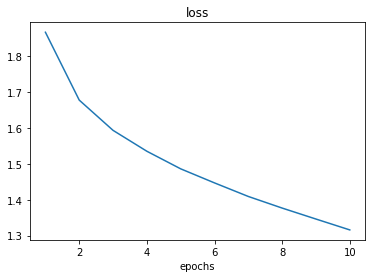

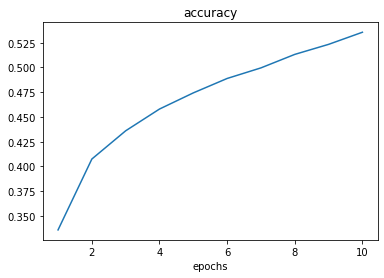

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),history.history['loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.show()
plt.figure()
plt.plot(range(1,11),history.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              3073000   
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 4,084,010
Trainable params: 4,084,010
Non-trainable params: 0
_________________________________________________________________



Momentum:

را کم می کند و همگرایی را سریع می کند gradient descent تکنیکی است که خطا

روش ان این صورت است که گرادیان مراحل قبل را هم حساب می کند

شود overshooting اگر مقدار ان را خیلی زیاد بگیریم ممکن است باعث

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.8117 - accuracy: 0.3530
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6179 - accuracy: 0.4241
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5335 - accuracy: 0.4574
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4681 - accuracy: 0.4807
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4196 - accuracy: 0.4983
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3748 - accuracy: 0.5148
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3365 - accuracy: 0.5264
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2995 - accuracy: 0.5383
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2634 - accuracy: 0.5546
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
0.52 accuracy
0

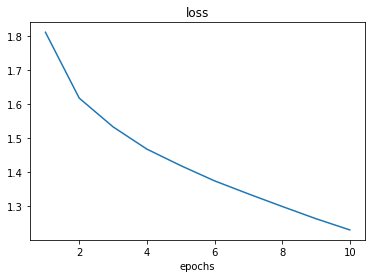

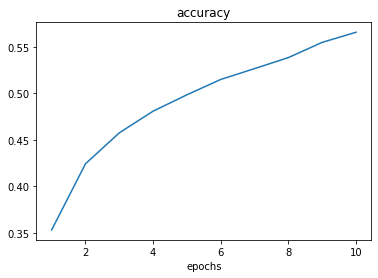

In [ ]:
model = Sequential()
model.add(Dense(1000, activation='relu', input_shape=(dim_data,)))
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax',kernel_initializer = 'uniform'))
optimizer = keras.optimizers.SGD(learning_rate=0.01,momentum=0.5)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history= model.fit(x_train, y_train, batch_size=32, epochs=10)
pred = model.predict(x_test, batch_size=32)
eva(pred)
import matplotlib.pyplot as plt
plt.plot(range(1,11),history.history['loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.show()
plt.figure()
plt.plot(range(1,11),history.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')
plt.show()

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8318 - accuracy: 0.3391
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6550 - accuracy: 0.4080
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5728 - accuracy: 0.4353
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5109 - accuracy: 0.4591
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4677 - accuracy: 0.4740
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4271 - accuracy: 0.4918
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3909 - accuracy: 0.5010
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3579 - accuracy: 0.5133
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3215 - accuracy: 0.5262
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
0.50 accuracy
0

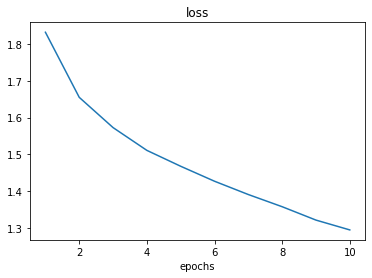

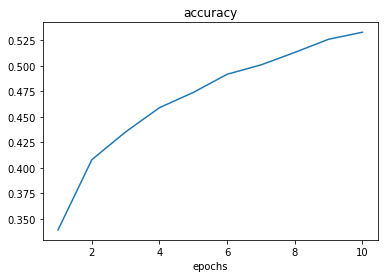

In [ ]:
model = Sequential()
model.add(Dense(1000, activation='relu', input_shape=(dim_data,)))
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax',kernel_initializer = 'uniform'))
optimizer = keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history= model.fit(x_train, y_train, batch_size=32, epochs=10)
pred = model.predict(x_test, batch_size=32)
eva(pred)
plt.plot(range(1,11),history.history['loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.show()
plt.figure()
plt.plot(range(1,11),history.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')
plt.show()

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 2.0370 - accuracy: 0.2672
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.2839 - accuracy: 0.1182
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3062 - accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3057 - accuracy: 0.0995
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3044 - accuracy: 0.1045
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3060 - accuracy: 0.1003
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3057 - accuracy: 0.1002
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3064 - accuracy: 0.0997
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3058 - accuracy: 0.0995
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
0.10 accuracy
0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


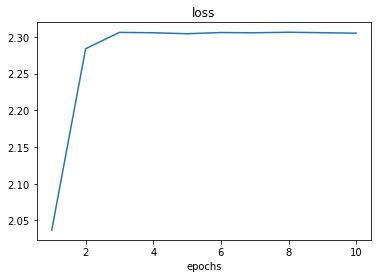

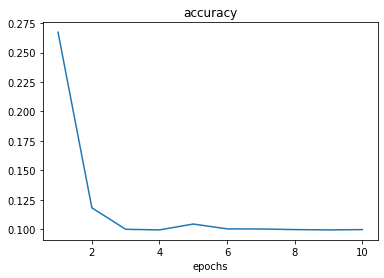

In [ ]:
model = Sequential()
model.add(Dense(1000, activation='relu', input_shape=(dim_data,)))
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax',kernel_initializer = 'uniform'))
optimizer = keras.optimizers.SGD(learning_rate=0.01,momentum=0.98)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history= model.fit(x_train, y_train, batch_size=32, epochs=10)
pred = model.predict(x_test, batch_size=32)
eva(pred)
plt.plot(range(1,11),history.history['loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.show()
plt.figure()
plt.plot(range(1,11),history.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')
plt.show()

we should alwayes use multi epoch to avoid underfitting beacuse most of the times gradient descent doesn't reach a global or a local minimum by one epoch

using a grater epoch can lead to overfitting  

to avoid overfitting we can train model by train and validation datasets and plot error in each epoch for traain and validation and stop training prosess when the error rate of validation data is minimum

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0886 - accuracy: 0.1783
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0862 - accuracy: 0.2497
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0844 - accuracy: 0.2827
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0829 - accuracy: 0.3043
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0817 - accuracy: 0.3191
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0808 - accuracy: 0.3343
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0799 - accuracy: 0.3461
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0792 - accuracy: 0.3526
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0785 - accuracy: 0.3590
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
0.37 accuracy
0

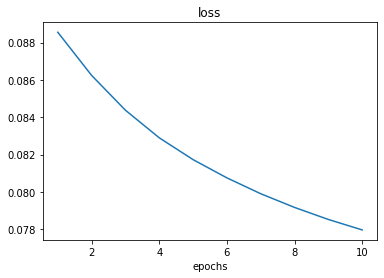

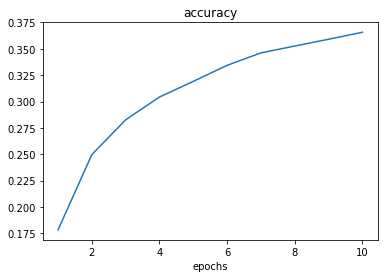

In [ ]:
model = Sequential()
model.add(Dense(1000, activation='relu', input_shape=(dim_data,)))
model.add(Dense(1000, activation='relu'))
#model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax',kernel_initializer = 'uniform'))
optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='MSE', metrics=['accuracy'])
history= model.fit(x_train, y_train, batch_size=32, epochs=10)
pred = model.predict(x_test, batch_size=32)
eva(pred)
plt.plot(range(1,11),history.history['loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.show()
plt.figure()
plt.plot(range(1,11),history.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')
plt.show()

 MSE results are poor in comparison to categorical_crossentropy

when a bounded value is passed to the MSE function the result is not convex; on one side the function is concave while on the other side the function convex and no clear minimum point. So, if by accident a binary classification neural network is initialized with weights which are large in magnitude such that it lands on the concave part of the MSE Cost function gradient descent will not work and consequently, weights may not update or improve very slowly

MSE function is apropriate for unbounded values
